# Table of Contents

0. Problem and Motivation
1. Set up the environment
2. Data Preprocessing
> a. Import the dataset <br>
> b. Add Headers <br>
> c. Identify and Handle Missing Data <br>
> d. Data Type Validation <br>
> e. Encoding the Categorical Variables <br>
> f. Define the dependent and Independent Variables <br>
> g. Splitting the dataset into training & testing set <br>
> h. Feature Scaling <br>
3. Exploratory Data Analysis
> a. Quick Summary (Numerical & Categorical) <br>
> b. Data Visualization <br>
> c. The Wald Test <br>
4. Model Development
> a. Logistic Regression <br>
> b. K-Nearest Neighbours <br>
> c. Support Vector Machine (SVM) <br>
> d. Kernel SVM <br>
> e. Naive Bayes <br>
> f. Decision Tree Classifier <br>
> g. Random Forest Classifier <br>
5. Model Evaluation and Selection
6. Conclusion


## 0. Problem and Motivation

Problem: Forest fire is a critical concern over the world, each year millions of hectares are destroyed all around the word. Algeria is one of the countries affected by this phenomenon, mainly in summerForest fires cause economic and ecological damage, as well as human life threat. Predicting forest fires is crucial to mitigate this threat.
You can read more through the paper puplished in 2020 on [Predicting Forest Fire in Algeria Using Data Mining Techniques: Case Study of the Decision Tree Algorithm](https://www.researchgate.net/publication/339062373_Predicting_Forest_Fire_in_Algeria_Using_Data_Mining_Techniques_Case_Study_of_the_Decision_Tree_Algorithm/download)

Motivation: In my project, I aim to develop a more accurate system for forest fire prediction by testing and comparing various classification models. In addition to the decision tree-based system proposed in existing literature, I will assess the performance of logistic regression, k-nearest neighbors, support vector machine, kernel SVM, Naive Bayes, random forest classification, and other classification models.

To identify the most significant features for predicting forest fires, I will also conduct tests based on the relationship between the independent variables (features) and the dependent variable (target). Specifically, I will utilize box plots to identify the variables that may be the best predictors and also conduct the Wald significance test.

## 1. Set up the environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data Preprocessing

### Import the dataset
- pandas acceptsa wide variety of file formats that can read data from (CSV - JSON - HTML - Excel - SQL - Pickle Files).
- In our case the data is formatted in csv file, so we import the dataset using `pd.read_csv()` function.
- `pd.read_csv()` accepts many atrributes can be accessed through `pd.read_csv?`
- In our case we used `delimeter=';'` option because the default is `delimeter=','`

In [2]:
# import the two datasets as pandas dataframes
bejaia_region = pd.read_csv('dataset/Bejaia Region Dataset.csv')
sidi_bel_abbes_region = pd.read_csv('dataset/Sidi-Bel Abbes Region Dataset.csv')

In [3]:
# check the top rows of the first region
bejaia_region.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [4]:
# check the top rows of the second region
sidi_bel_abbes_region.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


In [5]:
# check the shape of the first region
bejaia_region.shape

(122, 14)

In [6]:
# check the shape of the second region
sidi_bel_abbes_region.shape

(122, 14)

### Concatenate the two data sets (Vertically)
- `pd.concat` is a function in the pandas library that is used to concatenate and combine multiple dataframes or series into a single object. 
- It allows users to stack data vertically or horizontally, depending on the axis parameter, and can handle missing values and duplicate indices.

In [7]:
dataset = pd.concat([bejaia_region, sidi_bel_abbes_region], ignore_index=True)

In [8]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [9]:
dataset.shape

(244, 14)

### Drop unnecessary columns
- `pd.DataFrame.drop` is a function in the pandas library that is used to remove columns or rows from a dataframe based on specified labels or conditions.
- It allows users to selectively drop columns or rows that are not relevant or needed for a particular analysis, or that contain missing or incorrect data

In [10]:
dataset = dataset.drop(columns=['day', 'month', 'year'])

In [11]:
dataset.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


### Add Headers
- I noticed that there are some columns has names that may be misleading so we will replace the headers with more meaningful headers
- More information about the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++)

In [12]:
headers = ['temp', 'relative_humidity', 'wind_speed', 'rain_mm', 'fine_fuel_moisture_code', 'duff_moisture_code',
            'drought_code', 'initial_speed_index', 'buildup_index', 'fire_weather_index', 'class']

In [13]:
dataset.columns = headers

In [14]:
dataset.head()

,temp,relative_humidity,wind_speed,rain_mm,fine_fuel_moisture_code,duff_moisture_code,drought_code,initial_speed_index,buildup_index,fire_weather_index,class
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


### Identify and handle missing data

In [15]:
dataset.isna().sum()

temp                       0
relative_humidity          0
wind_speed                 0
rain_mm                    0
fine_fuel_moisture_code    0
duff_moisture_code         0
drought_code               0
initial_speed_index        0
buildup_index              0
fire_weather_index         0
class                      1
dtype: int64

We only have one row with missing value in class column where we can't do any thing except dropping this observation

In [16]:
# check this row
null_rows = dataset[ dataset['class'].isnull()]

In [17]:
null_rows

,temp,relative_humidity,wind_speed,rain_mm,fine_fuel_moisture_code,duff_moisture_code,drought_code,initial_speed_index,buildup_index,fire_weather_index,class
165,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [18]:
# drop the row with na value
dataset.dropna(inplace=True)

In [19]:
# recheck that we don't have any missing values now
dataset.isna().sum()

temp                       0
relative_humidity          0
wind_speed                 0
rain_mm                    0
fine_fuel_moisture_code    0
duff_moisture_code         0
drought_code               0
initial_speed_index        0
buildup_index              0
fire_weather_index         0
class                      0
dtype: int64

### Data type validation
- It's important to check data types to ensure that it won't produce unexpected results
- pandas offers `pd.DataFrame.dtypes` to check the data type of each column

In [20]:
dataset.dtypes

temp                         int64
relative_humidity            int64
wind_speed                   int64
rain_mm                    float64
fine_fuel_moisture_code    float64
duff_moisture_code         float64
drought_code                object
initial_speed_index        float64
buildup_index              float64
fire_weather_index          object
class                       object
dtype: object

We have `drought_code` and `fire_weather_index` columns with invalid data types as they supposed to be floats

In [21]:
# change the data types of both columns
dataset[['drought_code', 'fire_weather_index']]= dataset[['drought_code', 'fire_weather_index']].astype('float64')

In [22]:
dataset.dtypes

temp                         int64
relative_humidity            int64
wind_speed                   int64
rain_mm                    float64
fine_fuel_moisture_code    float64
duff_moisture_code         float64
drought_code               float64
initial_speed_index        float64
buildup_index              float64
fire_weather_index         float64
class                       object
dtype: object

## Exploratory Data Analysis

### Quick Summary (Numerical & Categorical)

In [23]:
# get quick summary on the numerical data
dataset.describe()

,temp,relative_humidity,wind_speed,rain_mm,fine_fuel_moisture_code,duff_moisture_code,drought_code,initial_speed_index,buildup_index,fire_weather_index
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391
std,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [24]:
# get quick summary on the categorical data
dataset.describe(include='object')

,class
count,243
unique,8
top,fire
freq,131


In [25]:
np.unique(dataset['class'])

array(['fire', 'fire ', 'fire   ', 'not fire', 'not fire ', 'not fire   ',
       'not fire    ', 'not fire     '], dtype=object)

We find that there are some typos/extra spaces in `class` column we will handle them

In [26]:
vec_strip = np.vectorize(str.strip)
dataset['class'] = dataset['class'].apply(vec_strip)

In [27]:
# get quick summary on the categorical data
dataset.describe(include='object')

,class
count,243
unique,2
top,fire
freq,137


In [28]:
np.unique(dataset['class'])

array(['fire', 'not fire'], dtype=object)

### Data Visualization

Now we can proced to show some barplots of all the features divided by class (fire or not fire)

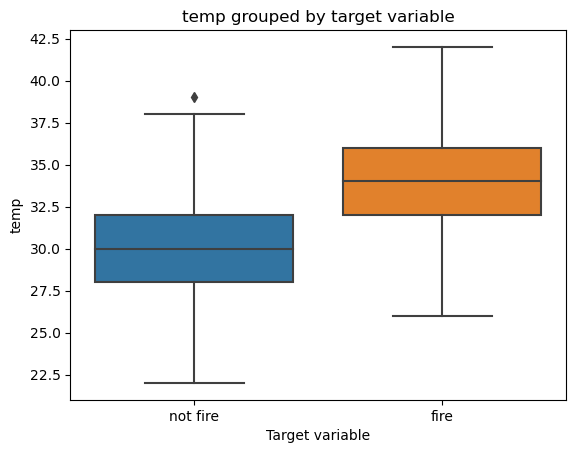

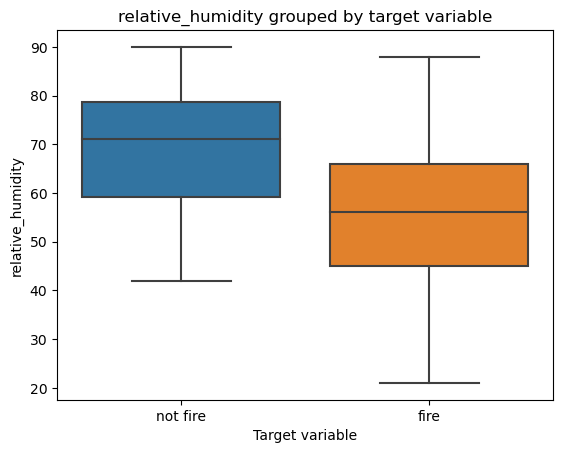

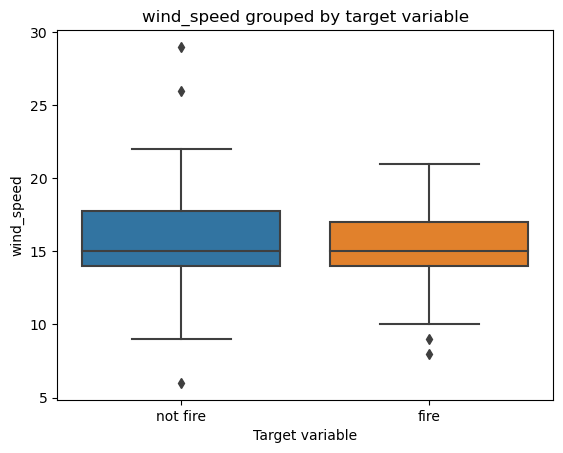

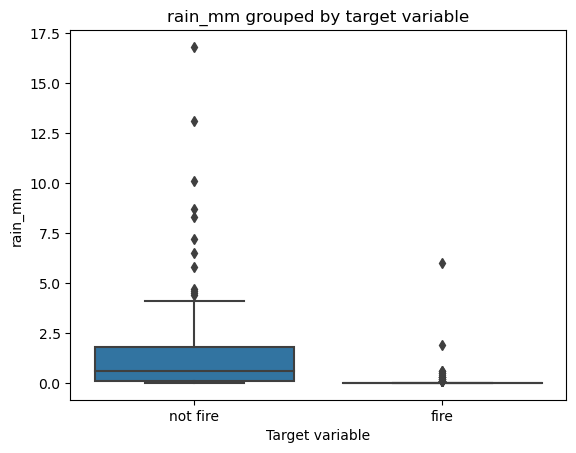

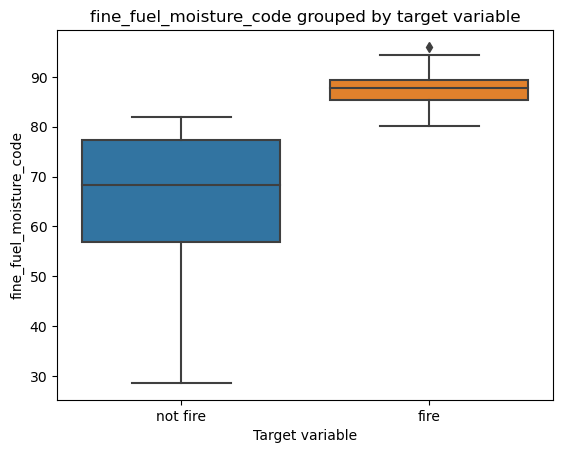

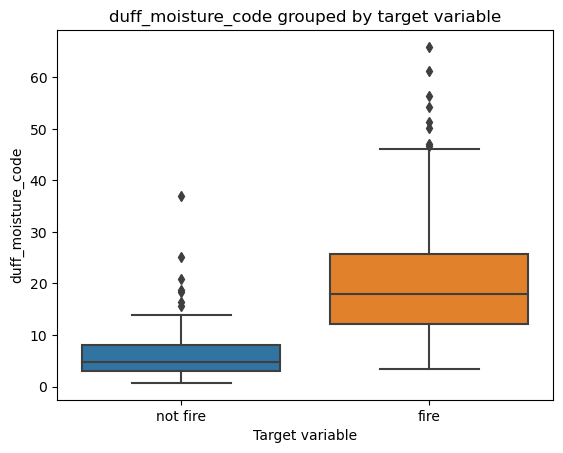

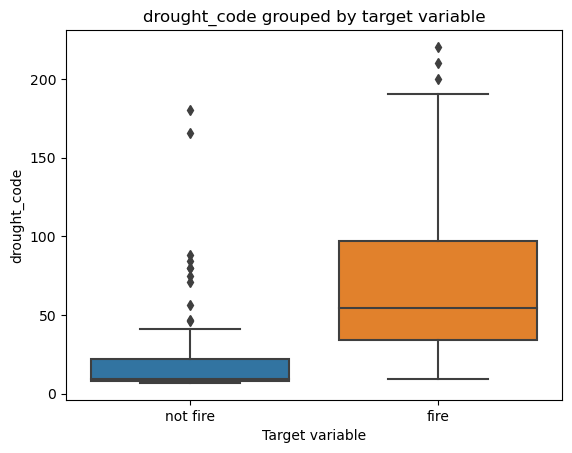

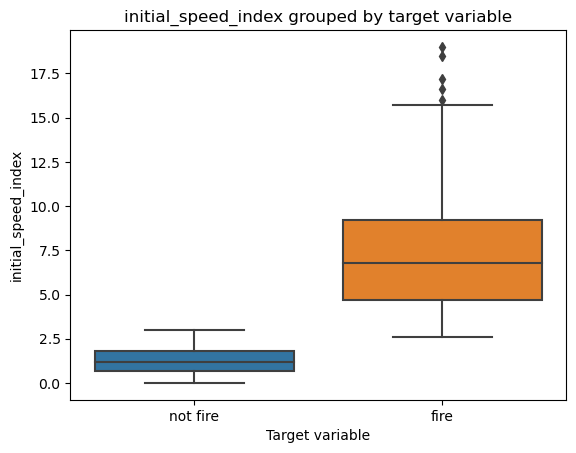

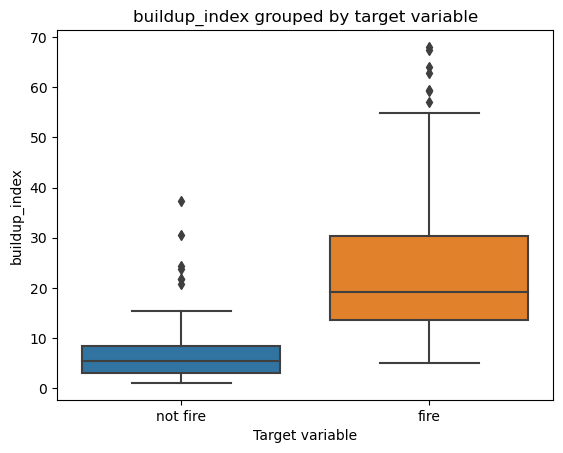

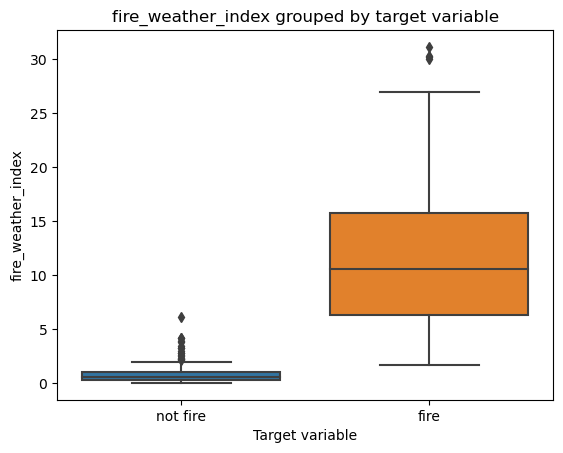

In [29]:
for feature in dataset.columns[:-1]:
    sns.boxplot(x='class', y=feature , data=dataset)
    plt.xlabel('Target variable')
    plt.ylabel(f'{feature}')
    plt.title(f'{feature} grouped by target variable')
    plt.show()

We can conclude from the graphs that there are some variables that may be a good predictor for the target variable

In [30]:
selected_variables_based_on_box = ['rain_mm', 'fine_fuel_moisture_code', 'duff_moisture_code', 'drought_code', 'initial_speed_index', 'buildup_index', 'fire_weather_index']

###  The Wald Test
The wald test which tests the hypothesis that the coefficient of an independent variable is equal to zero. The null hypothesis is that the variable has no effect on the outcome, while the alternative hypothesis is that the variable has a non-zero effect on the outcome.

The Wald test uses the estimated coefficient, its standard error, and the degrees of freedom to calculate a z-score and a p-value. If the p-value is less than a chosen significance level (e.g., 0.05), then we reject the null hypothesis and conclude that the variable is significant.

In [31]:
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

p_values = []
for feature in dataset.columns[:-1]:
    # Fit the logistic regression model
    model = sm.Logit(LabelEncoder().fit_transform(dataset['class']), sm.add_constant(dataset[feature])).fit()

    # Print the model summary
    print(model.summary())

    # Perform the Wald test for the independent variable
    p_values.append((model.wald_test(feature).pvalue, feature))

    print("Wald test p-value:", model.wald_test(feature).pvalue)

Optimization terminated successfully.
         Current function value: 0.532300
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  243
Model:                          Logit   Df Residuals:                      241
Method:                           MLE   Df Model:                            1
Date:                Tue, 07 Mar 2023   Pseudo R-squ.:                  0.2229
Time:                        05:31:15   Log-Likelihood:                -129.35
converged:                       True   LL-Null:                       -166.45
Covariance Type:            nonrobust   LLR p-value:                 7.037e-18
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0405      1.746      6.895      0.000       8.618      15.463
temp          -0.3847      0.

/Users/zaghloul2012/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1889: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(
/Users/zaghloul2012/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1889: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(
/Users/zaghloul2012/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1889: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the

In [32]:
p_values.sort()

In [33]:
for i in range(5):
    print(p_values[i][1])

duff_moisture_code
buildup_index
temp
drought_code
relative_humidity


In [34]:
selected_variables_based_on_walt = ['duff_moisture_code', 'buildup_index', 'temp', 'drought_code', 'relative_humidity']

### Encoding the categorical variables

In [35]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
dataset['class'] = encoder.fit_transform(dataset['class'])

In [36]:
dataset['class']

0      1
1      1
2      1
3      1
4      1
      ..
239    0
240    1
241    1
242    1
243    1
Name: class, Length: 243, dtype: int64

### Define the dependent and independent variables

In [37]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

X_copy = X
y_copy = y

In [38]:
X = X.values
y = y.values

In [39]:
X

array([[29. , 57. , 18. , ...,  1.3,  3.4,  0.5],
       [29. , 61. , 13. , ...,  1. ,  3.9,  0.4],
       [26. , 82. , 22. , ...,  0.3,  2.7,  0.1],
       ...,
       [27. , 87. , 29. , ...,  0.4,  3.4,  0.2],
       [24. , 54. , 18. , ...,  1.7,  5.1,  0.7],
       [24. , 64. , 15. , ...,  1.2,  4.8,  0.5]])

In [40]:
y

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1])

In [41]:
X_box = X_copy[selected_variables_based_on_box].values

In [42]:
X_box

array([[ 0. , 65.7,  3.4, ...,  1.3,  3.4,  0.5],
       [ 1.3, 64.4,  4.1, ...,  1. ,  3.9,  0.4],
       [13.1, 47.1,  2.5, ...,  0.3,  2.7,  0.1],
       ...,
       [ 0.5, 45.9,  3.5, ...,  0.4,  3.4,  0.2],
       [ 0.1, 79.7,  4.3, ...,  1.7,  5.1,  0.7],
       [ 0.2, 67.3,  3.8, ...,  1.2,  4.8,  0.5]])

In [43]:
X_walt = X_copy[selected_variables_based_on_walt].values

In [44]:
X_walt

array([[ 3.4,  3.4, 29. ,  7.6, 57. ],
       [ 4.1,  3.9, 29. ,  7.6, 61. ],
       [ 2.5,  2.7, 26. ,  7.1, 82. ],
       ...,
       [ 3.5,  3.4, 27. ,  7.9, 87. ],
       [ 4.3,  5.1, 24. , 15.2, 54. ],
       [ 3.8,  4.8, 24. , 16.5, 64. ]])

### Splitting the dataset into training and testing dataset

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [46]:
X_train

array([[35. , 56. , 14. , ...,  2.1, 30.6,  6.1],
       [34. , 69. , 13. , ...,  4. ,  8.2,  3.9],
       [34. , 58. , 18. , ...,  8. , 14.1,  9.9],
       ...,
       [31. , 54. , 11. , ...,  2.5,  6.2,  1.7],
       [31. , 68. , 14. , ...,  4.6, 14.2,  6. ],
       [32. , 48. , 18. , ..., 13.2, 44. , 25.4]])

In [47]:
y_train

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0])

In [48]:
X_test

array([[2.900e+01, 5.700e+01, 1.400e+01, 0.000e+00, 8.930e+01, 1.250e+01,
        4.130e+01, 7.800e+00, 1.420e+01, 9.700e+00],
       [3.700e+01, 3.600e+01, 1.300e+01, 6.000e-01, 8.620e+01, 1.790e+01,
        3.670e+01, 4.800e+00, 1.780e+01, 7.200e+00],
       [3.300e+01, 6.800e+01, 1.900e+01, 0.000e+00, 8.560e+01, 1.250e+01,
        4.980e+01, 6.000e+00, 1.540e+01, 8.000e+00],
       [3.600e+01, 5.500e+01, 1.300e+01, 3.000e-01, 8.240e+01, 1.560e+01,
        9.250e+01, 3.700e+00, 2.200e+01, 6.300e+00],
       [3.200e+01, 4.900e+01, 1.100e+01, 0.000e+00, 8.940e+01, 9.800e+00,
        3.310e+01, 6.800e+00, 1.130e+01, 7.700e+00],
       [3.500e+01, 6.300e+01, 1.300e+01, 0.000e+00, 8.890e+01, 2.170e+01,
        7.700e+01, 7.100e+00, 2.550e+01, 1.210e+01],
       [3.200e+01, 7.100e+01, 1.200e+01, 7.000e-01, 5.710e+01, 2.500e+00,
        8.200e+00, 6.000e-01, 2.800e+00, 2.000e-01],
       [3.500e+01, 6.300e+01, 1.500e+01, 0.000e+00, 8.700e+01, 1.900e+01,
        8.510e+01, 5.900e+00, 2.440e+

In [49]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1])

### Feature Scaling

In [50]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [51]:
X_train

array([[ 0.74605716, -0.35570689, -0.56597023, ..., -0.66996332,
         0.92161105, -0.17485151],
       [ 0.47653185,  0.49381278, -0.91901919, ..., -0.23039678,
        -0.61556289, -0.46198744],
       [ 0.47653185, -0.22501155,  0.84622559, ...,  0.69500645,
        -0.21068225,  0.32111053],
       ...,
       [-0.33204406, -0.48640222, -1.6251171 , ..., -0.57742299,
        -0.75281056, -0.74912336],
       [-0.33204406,  0.42846512, -0.56597023, ..., -0.0915863 ,
        -0.20381987, -0.18790315],
       [-0.06251876, -0.87848823,  0.84622559, ...,  1.89803064,
         1.84117045,  2.34411363]])

In [52]:
y_train

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0])

In [53]:
X_test

array([[-0.87109467, -0.29035922, -0.56597023, -0.37365529,  0.7676283 ,
        -0.20437453, -0.19863432,  0.64873628, -0.20381987,  0.29500727],
       [ 1.28510776, -1.66266023, -0.91901919, -0.09872814,  0.54860768,
         0.22195514, -0.29313335, -0.04531614,  0.04322594, -0.03128355],
       [ 0.20700655,  0.42846512,  1.19927455, -0.37365529,  0.50621659,
        -0.20437453, -0.02401656,  0.23230483, -0.12147126,  0.07312951],
       [ 1.01558246, -0.42105456, -0.91901919, -0.23619171,  0.28013079,
         0.04037028,  0.8531809 , -0.29980203,  0.33144605, -0.14874825],
       [-0.06251876, -0.81314056, -1.6251171 , -0.37365529,  0.77469348,
        -0.41753937, -0.3670891 ,  0.41738548, -0.40282899,  0.03397461],
       [ 0.74605716,  0.10172678, -0.91901919, -0.37365529,  0.73936758,
         0.52196491,  0.53476028,  0.48679072,  0.57162948,  0.60824646],
       [-0.06251876,  0.62450812, -1.27206815, -0.05290694, -1.50736006,
        -0.99387393, -0.87861643, -1.01698953

In [54]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1])

## Model Development

# Selections Based on All Availabe Features

In [55]:
# Selections Based on Wald Test

### Logistic Regression
- Logistic regression is a statistical technique used to model the `probability` of a binary or categorical outcome based on one or more predictor variables.
- It is a type of generalized linear model that uses a logistic function to model the relationship between the predictor variables and the outcome variable.
- In logistic regression, the outcome variable is typically binary, such as yes/no or true/false, and the goal is to estimate the probability that the outcome variable equals 1 (or 0) given the values of the predictor variables. 
- The logistic function allows for the probability to be bounded between 0 and 1, making it well-suited for binary outcomes.

In [56]:
from sklearn.linear_model import LogisticRegression

logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, y_train)

LogisticRegression()

In [57]:
y_hat = logistic_classifier.predict(X_test)

In [58]:
y_hat

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1])

In [59]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1])

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

con_matrix = confusion_matrix(y_test, y_hat)
accuracy = accuracy_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
precision = precision_score(y_test, y_hat)
f = f1_score(y_test, y_hat)

print(f'Confusion Matrix: {con_matrix}')
print(f'Recall Score: {recall}')
print(f'Accuracy Score: {accuracy}')
print(f'Precision Score: {precision}')
print(f'F1 Score: {f}')

Confusion Matrix: [[25  1]
 [ 0 23]]
Recall Score: 1.0
Accuracy Score: 0.9795918367346939
Precision Score: 0.9583333333333334
F1 Score: 0.9787234042553191


### K-Nearest Neighbours
- K-nearest neighbors (KNN) is a machine learning algorithm used for both classification and regression tasks.
- The algorithm works by finding the K-nearest neighbors to a given data point in the training dataset, based on a distance metric such as Euclidean distance or Manhattan distance.
- The predicted value for the given data point is then determined based on the majority class of the K-nearest neighbors for classification, or the average of the K-nearest neighbors for regression.

In [61]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [62]:
y_hat = knn_classifier.predict(X_test)

/Users/zaghloul2012/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [63]:
y_hat

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1])

In [64]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1])

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

con_matrix = confusion_matrix(y_test, y_hat)
accuracy = accuracy_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
precision = precision_score(y_test, y_hat)
f = f1_score(y_test, y_hat)

print(f'Confusion Matrix: {con_matrix}')
print(f'Recall Score: {recall}')
print(f'Accuracy Score: {accuracy}')
print(f'Precision Score: {precision}')
print(f'F1 Score: {f}')

Confusion Matrix: [[23  3]
 [ 1 22]]
Recall Score: 0.9565217391304348
Accuracy Score: 0.9183673469387755
Precision Score: 0.88
F1 Score: 0.9166666666666666


### Support Vector Machine (SVM)
- Support vector classifier (SVC) is a machine learning algorithm used for binary classification tasks.
- The algorithm works by `finding the hyperplane in a high-dimensional space that best separates the data` into different classes.
- The hyperplane is selected such that it maximizes the margin between the two classes, where the margin is defined as the distance between the hyperplane and the closest data points of each class.
- SVC is a type of supervised learning algorithm that uses a kernel function to transform the data into a `higher-dimensional space` where it can be more easily separated.
- The most common kernel functions are `linear`, `polynomial`, and `radial basis function (RBF)`, each with its own set of parameters that can be tuned for optimal performance.

In [66]:
from sklearn.svm import SVC

svc_classifier = SVC(kernel = 'linear', random_state = 0)
svc_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [67]:
y_hat = svc_classifier.predict(X_test)

In [68]:
y_hat

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1])

In [69]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1])

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

con_matrix = confusion_matrix(y_test, y_hat)
accuracy = accuracy_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
precision = precision_score(y_test, y_hat)
f = f1_score(y_test, y_hat)

print(f'Confusion Matrix: {con_matrix}')
print(f'Recall Score: {recall}')
print(f'Accuracy Score: {accuracy}')
print(f'Precision Score: {precision}')
print(f'F1 Score: {f}')

Confusion Matrix: [[25  1]
 [ 0 23]]
Recall Score: 1.0
Accuracy Score: 0.9795918367346939
Precision Score: 0.9583333333333334
F1 Score: 0.9787234042553191


### Kernel SVM
Kernel SVM (Support Vector Machine) is a variant of the traditional SVM algorithm that allows for non-linear decision boundaries. The algorithm works by mapping the input data into a higher-dimensional feature space using a kernel function, such as a radial basis function (RBF) or polynomial kernel. This transformation makes it possible to find a hyperplane in the higher-dimensional space that separates the data into different classes.

Kernel SVM is a powerful algorithm that can handle complex decision boundaries and is widely used in various applications, such as image classification, text classification, and bioinformatics. The choice of kernel function and its associated parameters is critical to the performance of the algorithm. Popular kernel functions include linear, polynomial, RBF, sigmoid, and Laplacian, each with its own advantages and disadvantages.



In [71]:
from sklearn.svm import SVC

kernel_svc_classifier = SVC(kernel = 'rbf', random_state = 0)
kernel_svc_classifier.fit(X_train, y_train)

SVC(random_state=0)

In [72]:
y_hat = kernel_svc_classifier.predict(X_test)

In [73]:
y_hat

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1])

In [74]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1])

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

con_matrix = confusion_matrix(y_test, y_hat)
accuracy = accuracy_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
precision = precision_score(y_test, y_hat)
f = f1_score(y_test, y_hat)

print(f'Confusion Matrix: {con_matrix}')
print(f'Recall Score: {recall}')
print(f'Accuracy Score: {accuracy}')
print(f'Precision Score: {precision}')
print(f'F1 Score: {f}')

Confusion Matrix: [[23  3]
 [ 1 22]]
Recall Score: 0.9565217391304348
Accuracy Score: 0.9183673469387755
Precision Score: 0.88
F1 Score: 0.9166666666666666


### Naive Bayes
Naive Bayes is a machine learning algorithm used for classification tasks, particularly in natural language processing and text classification. The algorithm is based on Bayes' theorem, which is used to calculate the probability of a hypothesis given the evidence. In the case of classification, the algorithm calculates the probability of a data point belonging to each class, based on the values of its features.

Naive Bayes assumes that the features are conditionally independent of each other, given the class variable. This means that the presence or absence of one feature does not affect the probability of another feature. Despite this simplifying assumption, Naive Bayes can perform surprisingly well on many classification tasks and is often used as a baseline model.

Naive Bayes comes in three main variants: Gaussian Naive Bayes, Multinomial Naive Bayes, and Bernoulli Naive Bayes. The choice of variant depends on the nature of the data and the problem being solved. Gaussian Naive Bayes is used for continuous data, while Multinomial and Bernoulli Naive Bayes are used for discrete data such as text.

In [76]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

GaussianNB()

In [77]:
y_hat = naive_bayes_classifier.predict(X_test)

In [78]:
y_hat

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1])

In [79]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1])

In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

con_matrix = confusion_matrix(y_test, y_hat)
accuracy = accuracy_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
precision = precision_score(y_test, y_hat)
f = f1_score(y_test, y_hat)

print(f'Confusion Matrix: {con_matrix}')
print(f'Recall Score: {recall}')
print(f'Accuracy Score: {accuracy}')
print(f'Precision Score: {precision}')
print(f'F1 Score: {f}')

Confusion Matrix: [[25  1]
 [ 1 22]]
Recall Score: 0.9565217391304348
Accuracy Score: 0.9591836734693877
Precision Score: 0.9565217391304348
F1 Score: 0.9565217391304348


### Decision Tree Classifer
Decision tree classifier is a supervised learning algorithm used for classification tasks. It works by recursively partitioning the feature space into regions that are increasingly pure with respect to the target variable. Each partition corresponds to a node in the tree, and the tree is constructed by repeatedly selecting the feature that provides the best split, according to some criterion such as entropy or Gini impurity.

Decision trees are interpretable and can be visualized, making them a useful tool for understanding the relationship between features and the target variable. They are also robust to outliers and can handle non-linear decision boundaries. However, they can be sensitive to small changes in the data and prone to overfitting if the tree is too deep or complex.



In [81]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [82]:
y_hat = decision_tree_classifier.predict(X_test)

In [83]:
y_hat

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1])

In [84]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1])

In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

con_matrix = confusion_matrix(y_test, y_hat)
accuracy = accuracy_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
precision = precision_score(y_test, y_hat)
f = f1_score(y_test, y_hat)

print(f'Confusion Matrix: {con_matrix}')
print(f'Recall Score: {recall}')
print(f'Accuracy Score: {accuracy}')
print(f'Precision Score: {precision}')
print(f'F1 Score: {f}')

Confusion Matrix: [[26  0]
 [ 0 23]]
Recall Score: 1.0
Accuracy Score: 1.0
Precision Score: 1.0
F1 Score: 1.0


### Random Forest Classifer
Random Forest Classifier is a type of ensemble learning algorithm that combines multiple decision trees to improve the accuracy and stability of the model. It works by constructing a set of decision trees on random subsets of the data and features, and then aggregating the predictions of these trees.

Each decision tree in the random forest is built independently, using a subset of the training data and a random subset of the features. The final prediction is obtained by aggregating the predictions of all the trees. This aggregation can be done by taking a simple majority vote for classification tasks, or by taking the mean or median for regression tasks.

Random Forests have several advantages over single decision trees, such as reducing overfitting and increasing the robustness to noise and outliers. They can handle high-dimensional data and are suitable for both classification and regression tasks. They are also easy to use and interpret, and can provide information about the importance of each feature.

In [86]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [87]:
y_hat = random_forest_classifier.predict(X_test)

In [88]:
y_hat

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1])

In [89]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1])

In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

con_matrix = confusion_matrix(y_test, y_hat)
accuracy = accuracy_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
precision = precision_score(y_test, y_hat)
f = f1_score(y_test, y_hat)

print(f'Confusion Matrix: {con_matrix}')
print(f'Recall Score: {recall}')
print(f'Accuracy Score: {accuracy}')
print(f'Precision Score: {precision}')
print(f'F1 Score: {f}')

Confusion Matrix: [[26  0]
 [ 0 23]]
Recall Score: 1.0
Accuracy Score: 1.0
Precision Score: 1.0
F1 Score: 1.0


# Selections Based on Boxplots

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_box, y, test_size=0.25, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [92]:
X_train

array([[-0.31830288,  0.86103378,  0.82966632, ...,  0.89709937,
         0.7278858 ,  1.0048957 ],
       [ 2.59876399, -0.96914461, -0.93132657, ..., -0.91779112,
        -0.93868129, -0.91743998],
       [-0.36388205,  1.07841129,  0.14874907, ...,  2.75736213,
        -0.03455178,  1.53033412],
       ...,
       [-0.36388205,  0.25798649, -0.72000743, ..., -0.57749915,
        -0.75650594, -0.75083756],
       [-0.36388205,  0.49640054, -0.24258268, ..., -0.1010904 ,
        -0.21672713, -0.199768  ],
       [-0.36388205,  0.92414338,  2.26976718, ...,  1.84991688,
         1.79394897,  2.28645282]])

In [93]:
y_train

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0])

In [94]:
X_test

array([[-3.63882055e-01,  7.69875468e-01, -2.11276144e-01,
        -2.10381315e-01,  6.24865799e-01, -2.16727126e-01,
         2.74408137e-01],
       [-9.04070350e-02,  5.52497959e-01,  2.11362151e-01,
        -3.04207885e-01, -5.57181353e-02,  2.61733410e-02,
        -4.59811428e-02],
       [-3.63882055e-01,  5.10424892e-01, -2.11276144e-01,
        -3.70061316e-02,  2.16515438e-01, -1.35760304e-01,
         5.65434268e-02],
       [-2.27144545e-01,  2.86035205e-01,  3.13495439e-02,
         8.33949201e-01, -3.05265578e-01,  3.09557220e-01,
        -1.61321284e-01],
       [-3.63882055e-01,  7.76887646e-01, -4.22595292e-01,
        -3.77637374e-01,  3.98004488e-01, -4.12396947e-01,
         1.80967132e-02],
       [-3.63882055e-01,  7.41826757e-01,  5.08774285e-01,
         5.17794455e-01,  4.66062881e-01,  5.45710452e-01,
         5.81981846e-01],
       [-4.48278650e-02, -1.48804576e+00, -9.93939655e-01,
        -8.85524675e-01, -1.00853564e+00, -9.85911940e-01,
        -9.4307112

In [95]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

### Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression

logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, y_train)

LogisticRegression()

In [97]:
y_hat = logistic_classifier.predict(X_test)

In [98]:
y_hat

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0])

In [99]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [100]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

con_matrix = confusion_matrix(y_test, y_hat)
accuracy = accuracy_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
precision = precision_score(y_test, y_hat)
f = f1_score(y_test, y_hat)

print(f'Confusion Matrix: {con_matrix}')
print(f'Recall Score: {recall}')
print(f'Accuracy Score: {accuracy}')
print(f'Precision Score: {precision}')
print(f'F1 Score: {f}')

Confusion Matrix: [[31  4]
 [ 1 25]]
Recall Score: 0.9615384615384616
Accuracy Score: 0.9180327868852459
Precision Score: 0.8620689655172413
F1 Score: 0.9090909090909091


### K-Nearest Neighbours

In [101]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [102]:
y_hat = knn_classifier.predict(X_test)

/Users/zaghloul2012/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [103]:
y_hat

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0])

In [104]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [105]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

con_matrix = confusion_matrix(y_test, y_hat)
accuracy = accuracy_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
precision = precision_score(y_test, y_hat)
f = f1_score(y_test, y_hat)

print(f'Confusion Matrix: {con_matrix}')
print(f'Recall Score: {recall}')
print(f'Accuracy Score: {accuracy}')
print(f'Precision Score: {precision}')
print(f'F1 Score: {f}')

Confusion Matrix: [[29  6]
 [ 2 24]]
Recall Score: 0.9230769230769231
Accuracy Score: 0.8688524590163934
Precision Score: 0.8
F1 Score: 0.8571428571428571


### Support Vector Machine (SVM)

In [106]:
from sklearn.svm import SVC

svc_classifier = SVC(kernel = 'linear', random_state = 0)
svc_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [107]:
y_hat = svc_classifier.predict(X_test)

In [108]:
y_hat

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0])

In [109]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [110]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

con_matrix = confusion_matrix(y_test, y_hat)
accuracy = accuracy_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
precision = precision_score(y_test, y_hat)
f = f1_score(y_test, y_hat)

print(f'Confusion Matrix: {con_matrix}')
print(f'Recall Score: {recall}')
print(f'Accuracy Score: {accuracy}')
print(f'Precision Score: {precision}')
print(f'F1 Score: {f}')

Confusion Matrix: [[31  4]
 [ 1 25]]
Recall Score: 0.9615384615384616
Accuracy Score: 0.9180327868852459
Precision Score: 0.8620689655172413
F1 Score: 0.9090909090909091


### Kernel SVM

In [111]:
from sklearn.svm import SVC

kernel_svc_classifier = SVC(kernel = 'rbf', random_state = 0)
kernel_svc_classifier.fit(X_train, y_train)

SVC(random_state=0)

In [112]:
y_hat = kernel_svc_classifier.predict(X_test)

In [113]:
y_hat

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0])

In [114]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [115]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

con_matrix = confusion_matrix(y_test, y_hat)
accuracy = accuracy_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
precision = precision_score(y_test, y_hat)
f = f1_score(y_test, y_hat)

print(f'Confusion Matrix: {con_matrix}')
print(f'Recall Score: {recall}')
print(f'Accuracy Score: {accuracy}')
print(f'Precision Score: {precision}')
print(f'F1 Score: {f}')

Confusion Matrix: [[29  6]
 [ 2 24]]
Recall Score: 0.9230769230769231
Accuracy Score: 0.8688524590163934
Precision Score: 0.8
F1 Score: 0.8571428571428571


### Naive Bayes

In [116]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

GaussianNB()

In [117]:
y_hat = naive_bayes_classifier.predict(X_test)

In [118]:
y_hat

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0])

In [119]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [120]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

con_matrix = confusion_matrix(y_test, y_hat)
accuracy = accuracy_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
precision = precision_score(y_test, y_hat)
f = f1_score(y_test, y_hat)

print(f'Confusion Matrix: {con_matrix}')
print(f'Recall Score: {recall}')
print(f'Accuracy Score: {accuracy}')
print(f'Precision Score: {precision}')
print(f'F1 Score: {f}')

Confusion Matrix: [[31  4]
 [ 2 24]]
Recall Score: 0.9230769230769231
Accuracy Score: 0.9016393442622951
Precision Score: 0.8571428571428571
F1 Score: 0.888888888888889


### Decision Tree Classifer

In [121]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [122]:
y_hat = decision_tree_classifier.predict(X_test)

In [123]:
y_hat

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [124]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [125]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

con_matrix = confusion_matrix(y_test, y_hat)
accuracy = accuracy_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
precision = precision_score(y_test, y_hat)
f = f1_score(y_test, y_hat)

print(f'Confusion Matrix: {con_matrix}')
print(f'Recall Score: {recall}')
print(f'Accuracy Score: {accuracy}')
print(f'Precision Score: {precision}')
print(f'F1 Score: {f}')

Confusion Matrix: [[33  2]
 [ 1 25]]
Recall Score: 0.9615384615384616
Accuracy Score: 0.9508196721311475
Precision Score: 0.9259259259259259
F1 Score: 0.9433962264150944


### Random Forest Classifer

In [126]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [127]:
y_hat = random_forest_classifier.predict(X_test)

In [128]:
y_hat

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0])

In [129]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [130]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

con_matrix = confusion_matrix(y_test, y_hat)
accuracy = accuracy_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
precision = precision_score(y_test, y_hat)
f = f1_score(y_test, y_hat)

print(f'Confusion Matrix: {con_matrix}')
print(f'Recall Score: {recall}')
print(f'Accuracy Score: {accuracy}')
print(f'Precision Score: {precision}')
print(f'F1 Score: {f}')

Confusion Matrix: [[32  3]
 [ 0 26]]
Recall Score: 1.0
Accuracy Score: 0.9508196721311475
Precision Score: 0.896551724137931
F1 Score: 0.9454545454545454


# Selections Based on Wald Test

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_walt, y, test_size=0.25, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression

In [132]:
from sklearn.linear_model import LogisticRegression

logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, y_train)

LogisticRegression()

In [133]:
y_hat = logistic_classifier.predict(X_test)

In [134]:
y_hat

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1])

In [135]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [136]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

con_matrix = confusion_matrix(y_test, y_hat)
accuracy = accuracy_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
precision = precision_score(y_test, y_hat)
f = f1_score(y_test, y_hat)

print(f'Confusion Matrix: {con_matrix}')
print(f'Recall Score: {recall}')
print(f'Accuracy Score: {accuracy}')
print(f'Precision Score: {precision}')
print(f'F1 Score: {f}')

Confusion Matrix: [[24 11]
 [ 2 24]]
Recall Score: 0.9230769230769231
Accuracy Score: 0.7868852459016393
Precision Score: 0.6857142857142857
F1 Score: 0.7868852459016394


### K-Nearest Neighbours

In [137]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [138]:
y_hat = knn_classifier.predict(X_test)

/Users/zaghloul2012/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [139]:
y_hat

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [140]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [141]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

con_matrix = confusion_matrix(y_test, y_hat)
accuracy = accuracy_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
precision = precision_score(y_test, y_hat)
f = f1_score(y_test, y_hat)

print(f'Confusion Matrix: {con_matrix}')
print(f'Recall Score: {recall}')
print(f'Accuracy Score: {accuracy}')
print(f'Precision Score: {precision}')
print(f'F1 Score: {f}')

Confusion Matrix: [[24 11]
 [ 5 21]]
Recall Score: 0.8076923076923077
Accuracy Score: 0.7377049180327869
Precision Score: 0.65625
F1 Score: 0.7241379310344829


### Support Vector Machine (SVM)

In [142]:
from sklearn.svm import SVC

svc_classifier = SVC(kernel = 'linear', random_state = 0)
svc_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [143]:
y_hat = svc_classifier.predict(X_test)

In [144]:
y_hat

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1])

In [145]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [146]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

con_matrix = confusion_matrix(y_test, y_hat)
accuracy = accuracy_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
precision = precision_score(y_test, y_hat)
f = f1_score(y_test, y_hat)

print(f'Confusion Matrix: {con_matrix}')
print(f'Recall Score: {recall}')
print(f'Accuracy Score: {accuracy}')
print(f'Precision Score: {precision}')
print(f'F1 Score: {f}')

Confusion Matrix: [[23 12]
 [ 3 23]]
Recall Score: 0.8846153846153846
Accuracy Score: 0.7540983606557377
Precision Score: 0.6571428571428571
F1 Score: 0.7540983606557377


### Kernel SVM

In [147]:
from sklearn.svm import SVC

kernel_svc_classifier = SVC(kernel = 'rbf', random_state = 0)
kernel_svc_classifier.fit(X_train, y_train)

SVC(random_state=0)

In [148]:
y_hat = kernel_svc_classifier.predict(X_test)

In [149]:
y_hat

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1])

In [150]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [151]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

con_matrix = confusion_matrix(y_test, y_hat)
accuracy = accuracy_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
precision = precision_score(y_test, y_hat)
f = f1_score(y_test, y_hat)

print(f'Confusion Matrix: {con_matrix}')
print(f'Recall Score: {recall}')
print(f'Accuracy Score: {accuracy}')
print(f'Precision Score: {precision}')
print(f'F1 Score: {f}')

Confusion Matrix: [[25 10]
 [ 2 24]]
Recall Score: 0.9230769230769231
Accuracy Score: 0.8032786885245902
Precision Score: 0.7058823529411765
F1 Score: 0.8000000000000002


### Naive Bayes

In [152]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

GaussianNB()

In [153]:
y_hat = naive_bayes_classifier.predict(X_test)

In [154]:
y_hat

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [155]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [156]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

con_matrix = confusion_matrix(y_test, y_hat)
accuracy = accuracy_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
precision = precision_score(y_test, y_hat)
f = f1_score(y_test, y_hat)

print(f'Confusion Matrix: {con_matrix}')
print(f'Recall Score: {recall}')
print(f'Accuracy Score: {accuracy}')
print(f'Precision Score: {precision}')
print(f'F1 Score: {f}')

Confusion Matrix: [[18 17]
 [ 2 24]]
Recall Score: 0.9230769230769231
Accuracy Score: 0.6885245901639344
Precision Score: 0.5853658536585366
F1 Score: 0.7164179104477613


### Decision Tree Classifer

In [157]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [158]:
y_hat = decision_tree_classifier.predict(X_test)

In [159]:
y_hat

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1])

In [160]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [161]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

con_matrix = confusion_matrix(y_test, y_hat)
accuracy = accuracy_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
precision = precision_score(y_test, y_hat)
f = f1_score(y_test, y_hat)

print(f'Confusion Matrix: {con_matrix}')
print(f'Recall Score: {recall}')
print(f'Accuracy Score: {accuracy}')
print(f'Precision Score: {precision}')
print(f'F1 Score: {f}')

Confusion Matrix: [[27  8]
 [ 5 21]]
Recall Score: 0.8076923076923077
Accuracy Score: 0.7868852459016393
Precision Score: 0.7241379310344828
F1 Score: 0.7636363636363636


### Random Forest Classifer

In [162]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [163]:
y_hat = random_forest_classifier.predict(X_test)

In [164]:
y_hat

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1])

In [165]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [166]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

con_matrix = confusion_matrix(y_test, y_hat)
accuracy = accuracy_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
precision = precision_score(y_test, y_hat)
f = f1_score(y_test, y_hat)

print(f'Confusion Matrix: {con_matrix}')
print(f'Recall Score: {recall}')
print(f'Accuracy Score: {accuracy}')
print(f'Precision Score: {precision}')
print(f'F1 Score: {f}')

Confusion Matrix: [[27  8]
 [ 4 22]]
Recall Score: 0.8461538461538461
Accuracy Score: 0.8032786885245902
Precision Score: 0.7333333333333333
F1 Score: 0.7857142857142856


## Model Evaluation and Selection

After completing the project, it is essential to evaluate and select the most appropriate model for the task at hand.

Model evaluation is crucial to ensure that the selected model is accurate and reliable for making predictions. One way to evaluate model performance is by calculating various metrics such as accuracy, precision, recall, and F1 score.

- Accuracy is the percentage of correct predictions made by the model.
- Precision measures the proportion of true positive predictions among all positive predictions made by the model.
- Recall, on the other hand, measures the proportion of true positives that the model correctly identifies from all positive cases in the dataset.
- F1 score is the harmonic mean of precision and recall, which provides a single measure of the model's overall performance.

Each of these metrics has its strengths and weaknesses, and choosing the most suitable one depends on the specific needs of the project. Therefore, it is crucial to evaluate and compare models based on various performance metrics to choose the best one for the task at hand.

Here we can find three groups of features selected based on different criteria explained before Vs. results obtained from Faroudja Abid & Nouma Izeboudjen in [Predicting Forest Fire in Algeria Using Data Mining Techniques: Case Study of the Decision Tree Algorithm](https://www.researchgate.net/publication/339062373_Predicting_Forest_Fire_in_Algeria_Using_Data_Mining_Techniques_Case_Study_of_the_Decision_Tree_Algorithm)


#### Results in literature
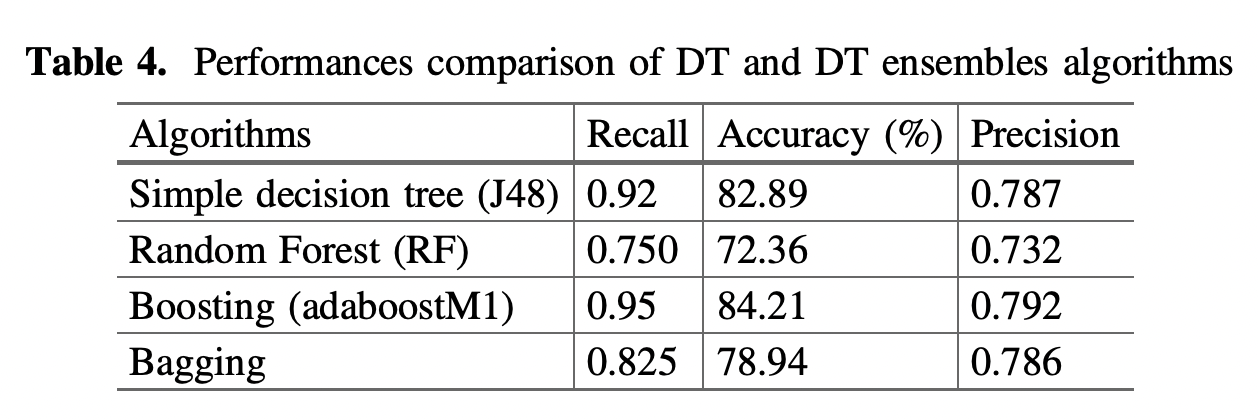

And here are our results

#### Selected Features Based on Variations in Box Plots Graphs
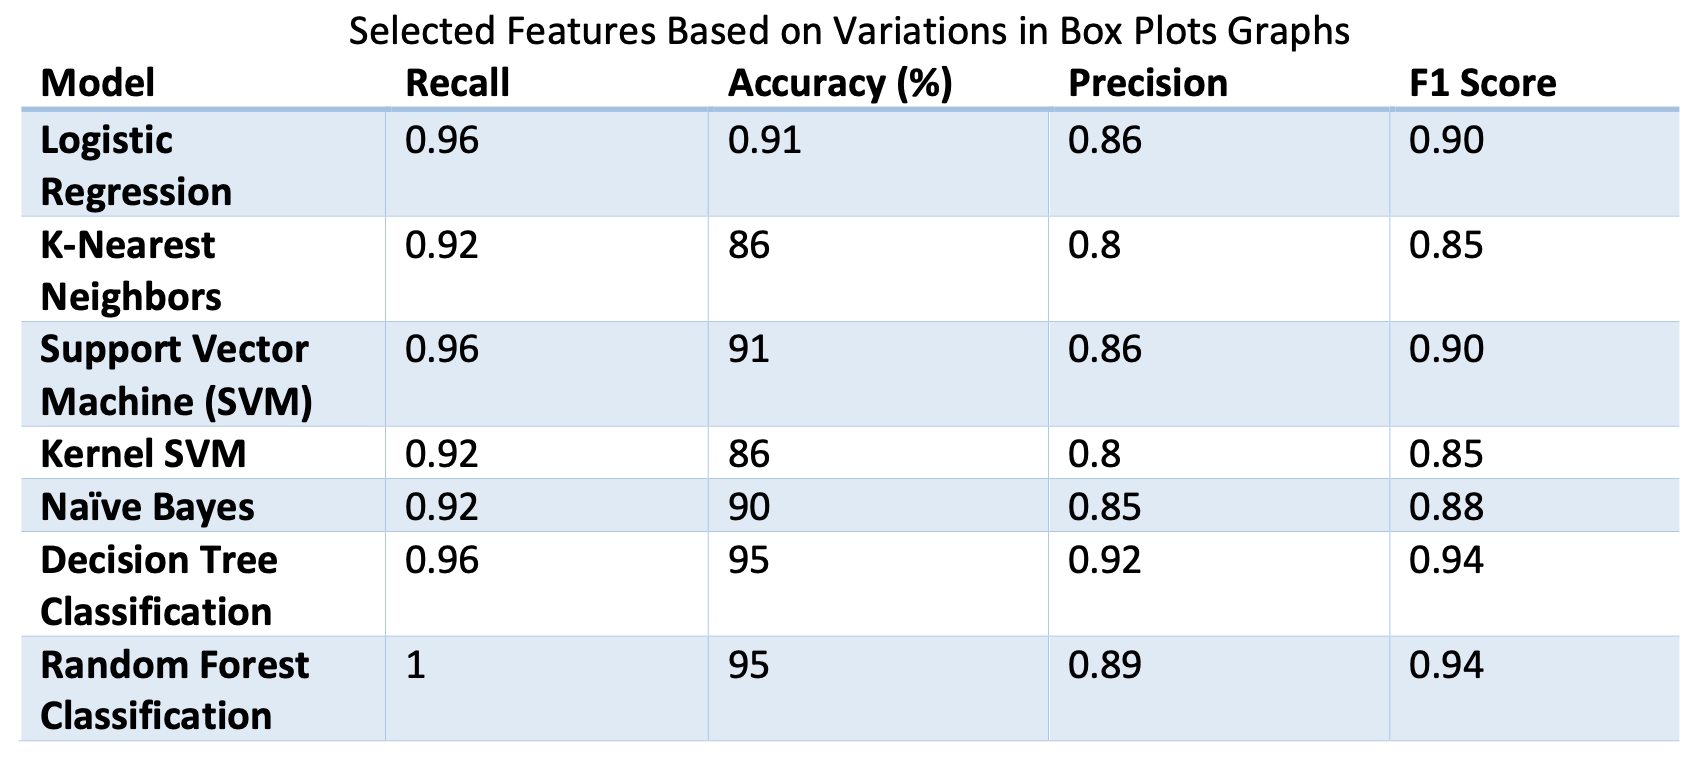

#### Selected Features Based on Wald Test
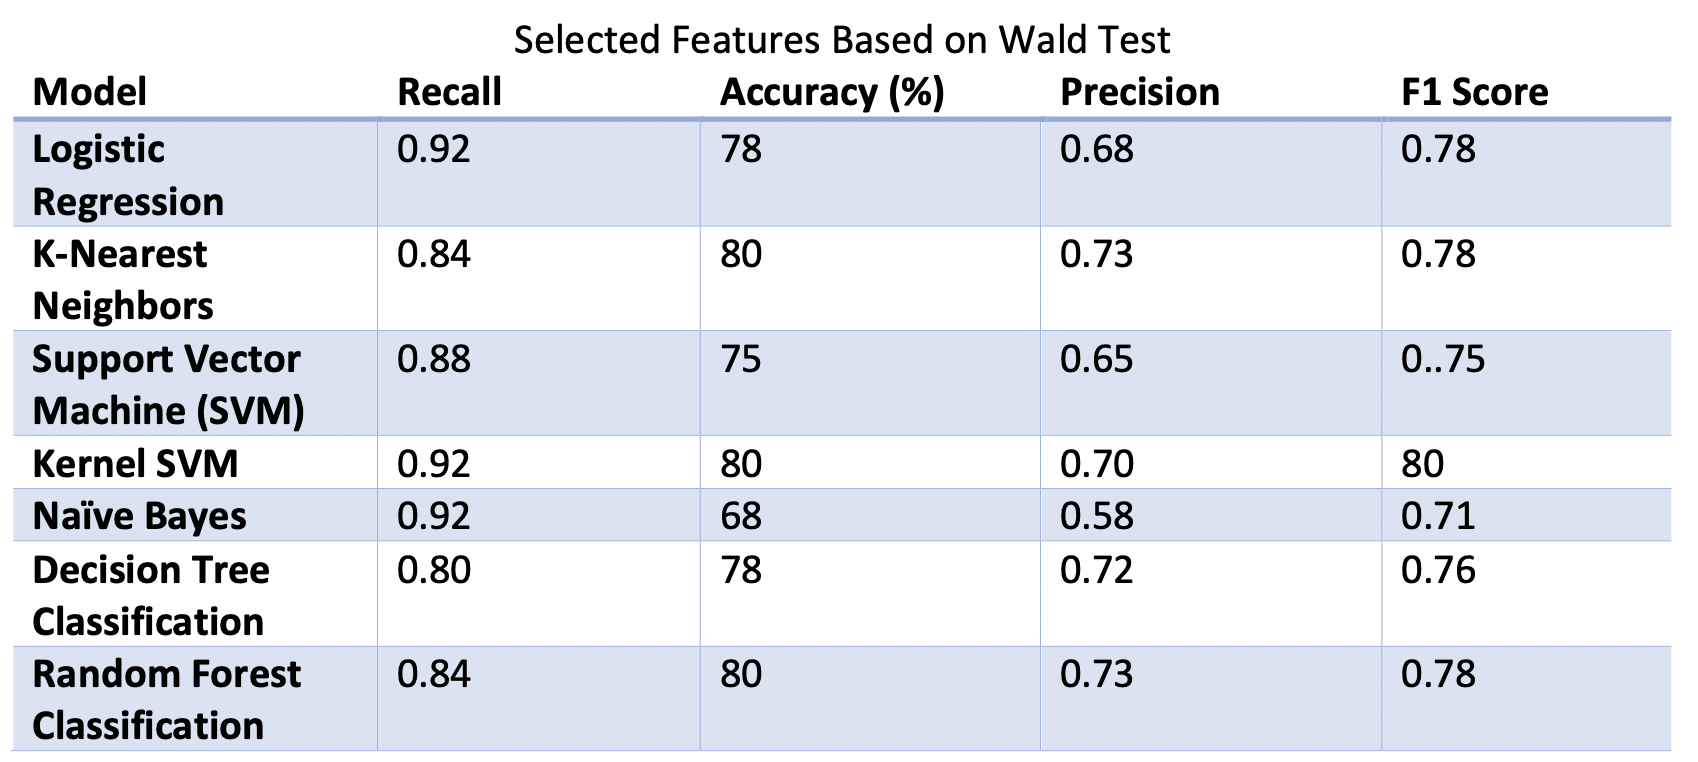

#### Using all Available Features
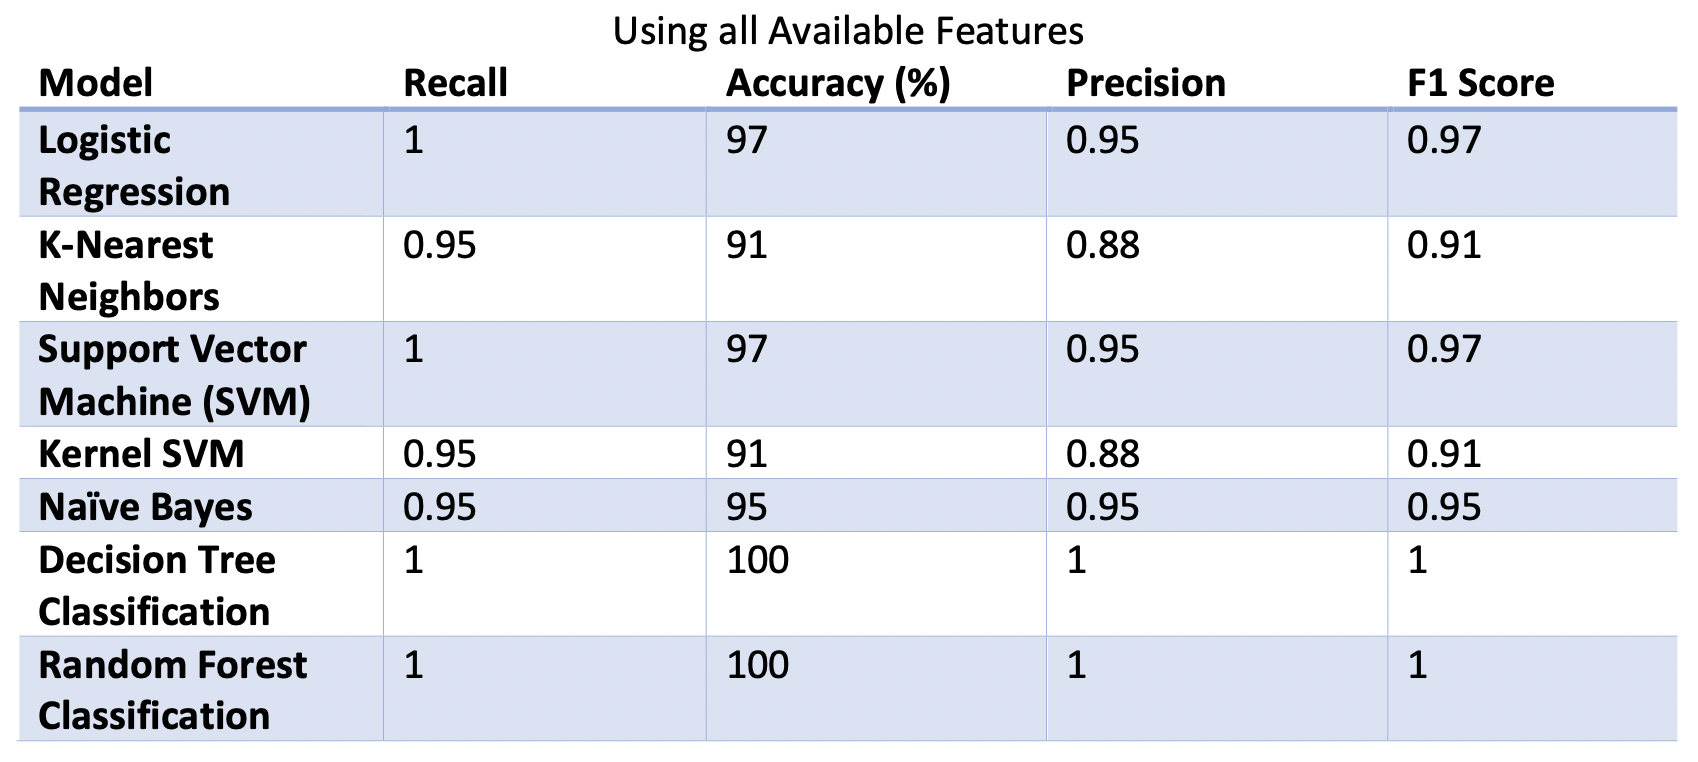

## Conclusion

In summary, our model has identified a specific set of features that can effectively predict the target variable with high accuracy.
These selected variables include 'rain_mm', 'fine_fuel_moisture_code', 'duff_moisture_code', 'drought_code', 'initial_speed_index', 'buildup_index', and 'fire_weather_index'.

Using these features, our model achieves an accuracy of 95% along with precision score of 0.94, recall score of 0.92, and f1 score of 0.96. These metrics outperform the results reported in the literature for the same decision tree classifier model.
